# **Book Recommendation System**

# Dataset Information

The dataset used for this project is the **Book Recommendation Dataset**, sourced from Kaggle : (https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset). 
It consists of various files containing detailed information about books, including:
- **Books.csv**: Includes book titles, authors, publication years, and links to book images.
- **Ratings.csv**: Contains user ratings for books.
- **Users.csv**: Includes user demographic information.

### Context
Recommendation systems have become an integral part of online platforms, helping users discover new content. This dataset provides the foundation for building a book recommendation system by analyzing user preferences and book metadata.

### Purpose of the Project
The goal is to develop a system that recommends books based on user input. By applying various Natural Language Processing (NLP) techniques, this project matches user queries with relevant books, creating a user-friendly recommendation tool.


## **1. Data Loading**

Load three datasets:
- `books.csv`: Contains details about books
- `users.csv`: Contains user information
- `ratings.csv`: Contains user ratings for books.
We also inspect the first few rows and overall structure of the datasets.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec


In [2]:
# Load datasets
books = pd.read_csv("data/Books.csv", low_memory=False)
ratings = pd.read_csv("data/Ratings.csv", low_memory=False)
users = pd.read_csv("data/Users.csv", low_memory=False)


## **2. Exploratory Data Analysis (EDA)**

Perform exploratory analysis to understand the structure, distributions, and relationships within the data. This includes visualizations and statistical summaries.

In [3]:
# Display dataset shapes and preview
print(f'Books dataset shape: {books.shape}')
print(f'Users dataset shape: {users.shape}')
print(f'Ratings dataset shape: {ratings.shape}')

Books dataset shape: (271360, 8)
Users dataset shape: (278858, 3)
Ratings dataset shape: (1149780, 3)


In [4]:
# Display first few rows of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
 # Display first few rows of ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
 # Display first few rows of users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# Combine datasets
combined_data = ratings.merge(books, on='ISBN', how='left').merge(users, on='User-ID', how='left')
print(f'Combined dataset shape: {combined_data.shape}')
combined_data.head()

Combined dataset shape: (1149780, 12)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [8]:
# Summary of statistics
combined_data.describe()

,User-ID,Book-Rating,Age
count,1.149780e+06,1.149780e+06,840288.000000
mean,1.403864e+05,2.866950e+00,37.239724
std,8.056228e+04,3.854184e+00,14.246676
min,2.000000e+00,0.000000e+00,0.000000
25%,7.034500e+04,0.000000e+00,28.000000
50%,1.410100e+05,0.000000e+00,35.000000
75%,2.110280e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


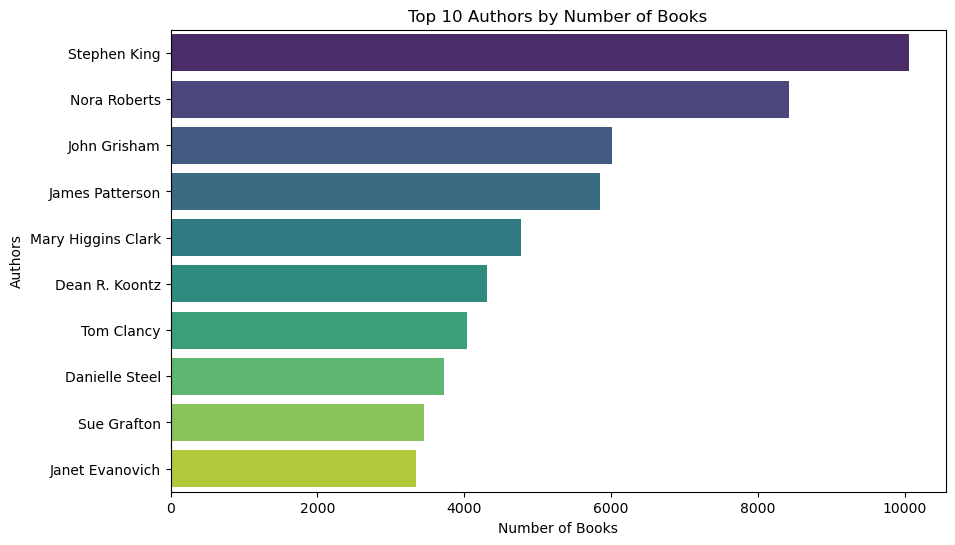

In [9]:
# Top authors by book count
top_authors = combined_data['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.show()


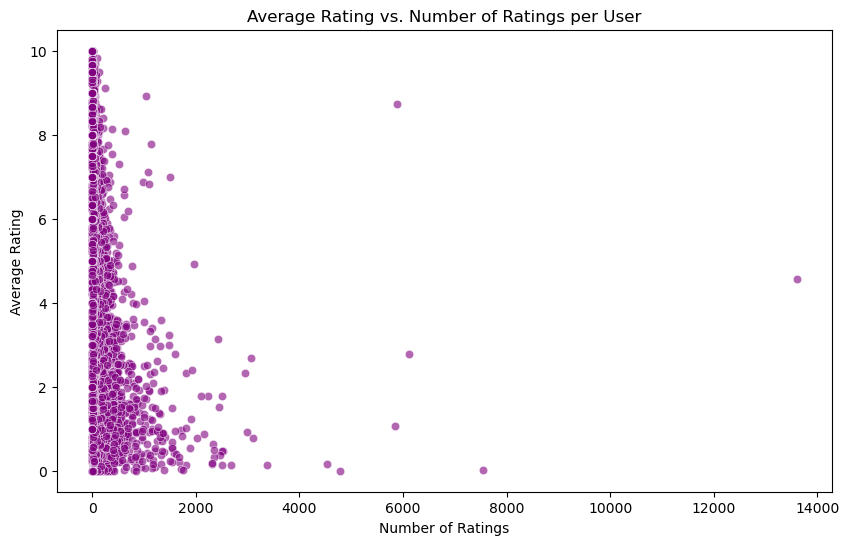

In [10]:
# Calculate average rating and number of ratings per user
user_stats = combined_data.groupby('User-ID').agg(
    avg_rating=('Book-Rating', 'mean'),
    num_ratings=('Book-Rating', 'count')
).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_stats, x='num_ratings', y='avg_rating', alpha=0.6, color='purple')
plt.title('Average Rating vs. Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()


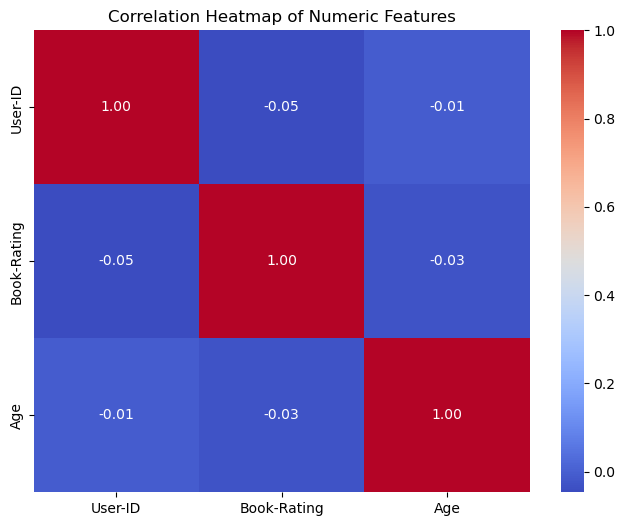

In [11]:
# Heatmap of correlation between numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(combined_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


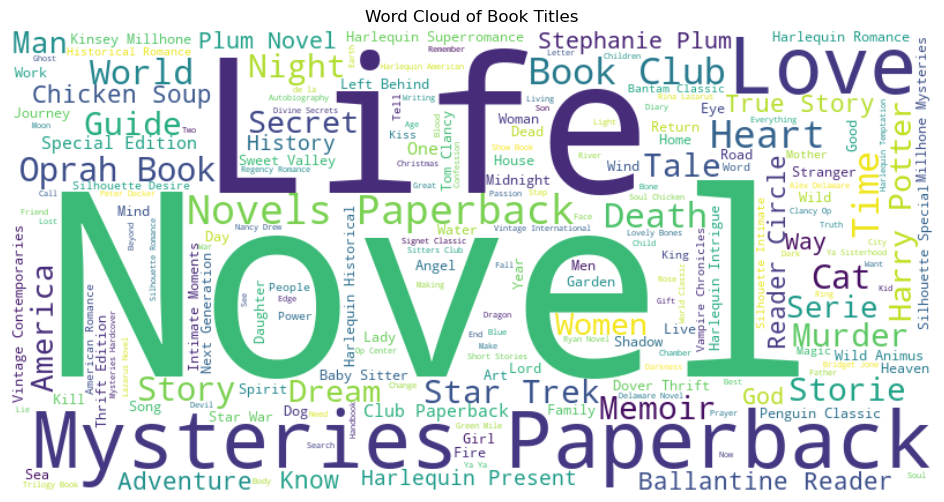

In [12]:
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(combined_data['Book-Title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()


## **3. Data Cleaning**

Data cleaning ensures consistency and suitability for analysis. This includes handling missing values, correcting data types, and removing duplicates or irrelevant records.

In [13]:
# Duplicate datasets before cleaning
books_cleaned = books.copy()
ratings_cleaned = ratings.copy()
users_cleaned = users.copy()


In [14]:
# Handle non-numeric and invalid values in 'Year-Of-Publication'
combined_data['Year-Of-Publication'] = combined_data['Year-Of-Publication'].replace('Unknown', np.nan)
combined_data['Year-Of-Publication'] = pd.to_numeric(combined_data['Year-Of-Publication'], errors='coerce')

# Fill missing years with the median
combined_data['Year-Of-Publication'] = combined_data['Year-Of-Publication'].fillna(combined_data['Year-Of-Publication'].median())

# Restrict to a valid year range
combined_data = combined_data[
    (combined_data['Year-Of-Publication'] >= 1900) & (combined_data['Year-Of-Publication'] <= 2023)
]

# Verify cleaning
print(combined_data['Year-Of-Publication'].unique())


[2002. 2001. 1996. 1999. 1998. 1997. 1994. 1995. 2003. 1992. 1983. 2000.
 1989. 1991. 1993. 1976. 1990. 1982. 1988. 1981. 1986. 1987. 1980. 2004.
 1984. 1985. 1979. 1974. 1977. 1965. 1972. 1978. 1962. 1957. 1958. 1960.
 1963. 1969. 1970. 1975. 1959. 1968. 1971. 1973. 1950. 1964. 1955. 1953.
 1966. 1930. 1961. 1952. 1940. 1954. 1967. 1911. 1946. 1941. 1920. 1956.
 1942. 1951. 1948. 2005. 1943. 1937. 1923. 1945. 1947. 1936. 1925. 1927.
 2011. 2020. 1939. 1926. 1938. 1904. 1949. 1932. 1929. 1944. 1933. 1922.
 1902. 1924. 1921. 1900. 2010. 1928. 2006. 1901. 2021. 1931. 1908. 1909.
 2012. 2008. 1935. 1906. 1917. 1919. 1914. 1934. 1910.]


In [15]:
# Drop duplicates
combined_data = combined_data.drop_duplicates()

# Drop rows with missing critical data
combined_data = combined_data.dropna(subset=['Book-Title', 'Book-Author'])

# Verify cleaning
print(combined_data.isnull().sum())
combined_data.info()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
Location                    0
Age                    274249
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017068 entries, 0 to 1149778
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1017068 non-null  int64  
 1   ISBN                 1017068 non-null  object 
 2   Book-Rating          1017068 non-null  int64  
 3   Book-Title           1017068 non-null  object 
 4   Book-Author          1017068 non-null  object 
 5   Year-Of-Publication  1017068 non-null  float64
 6   Publisher            1017066 non-null  object 
 7   Image-URL-S          1017068 non-null  ob

In [16]:
# Check for missing values in all columns
print(combined_data.isnull().sum())


User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
Location                    0
Age                    274249
dtype: int64


## **4. Natural Language Processing (NLP) Techniques**

NLP techniques are applied to preprocess and analyze textual data, including:
- **Tokenization**: Splitting text into words
- **Stemming and Lemmatization**: Reducing words to their base forms
- **Word2Vec**: Converting text into vector representations
- **TF-IDF**: Measuring word importance in documents.


In [17]:
#Tokenization

# Initialize CountVectorizer to convert text into a matrix of token counts.
vectorizer = CountVectorizer()

# Fit and transform the 'Book-Title' column into a token count matrix.
title_tokens = vectorizer.fit_transform(combined_data['Book-Title'])

# Print the shape of the tokenized data (rows: book titles, columns: unique tokens).
print('Tokenized Data Shape:', title_tokens.shape)



Tokenized Data Shape: (1017068, 77542)


In [18]:
# Stemming and Lemmatization
# Initialize the stemmer and lemmatizer for text preprocessing.
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming to the 'Book-Title' column.
# This reduces words to their root form (e.g., "running" -> "run").
combined_data["stemmed_title"] = combined_data["Book-Title"].apply(
    lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)])
)

# Apply lemmatization to the 'Book-Title' column.
# This reduces words to their base form with context (e.g., "better" -> "good").
combined_data["lemmatized_title"] = combined_data["Book-Title"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
)


In [19]:
import re
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Clean the text by removing special characters, numbers, and stopwords
combined_data['cleaned_title'] = combined_data['lemmatized_title'].apply(
    lambda x: ' '.join(
        word for word in re.sub(r'[^a-zA-Z\s]', '', x).lower().split() if word not in stop_words
    )
)

# Tokenize the cleaned text into a list of word tokens
tokenized_data = combined_data['cleaned_title'].apply(lambda x: x.split()).tolist()

print("Sample tokenized data:", tokenized_data[:5])  # Preview the tokenized output


Sample tokenized data: [['flesh', 'tones', 'novel'], ['rites', 'passage'], ['notebook'], ['help', 'level'], ['amsterdam', 'connection', 'level', 'cambridge', 'english', 'readers']]


In [20]:
# Word2Vec

# Train the Word2Vec model on the tokenized data.
# Word2Vec learns a numerical vector representation for each word based on its context in the data.
model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Print the vocabulary.
# Display the first 10 words learned by the model to check the vocabulary.
print("Vocabulary:", list(model.wv.key_to_index.keys())[:10])

# Retrieve the vector for a specific word.
# If the word "book" is in the vocabulary, print its vector representation.
if "book" in model.wv.key_to_index:
    print("Vector for 'book':", model.wv["book"])
else:
    print("'book' is not in the vocabulary.")


Vocabulary: ['novel', 'book', 'paperback', 'life', 'harlequin', 'love', 'mysteries', 'series', 'mystery', 'amp']
Vector for 'book': [-1.7477875  -0.8675251   0.26435462  0.4818579   0.62128377 -1.5414021
  0.9373098   0.81121415 -1.2944534  -0.7136004   0.6998242  -2.0776365
 -0.16120797  0.67118657  0.3256419   2.2280872  -0.11837562 -1.6640902
  0.10103315 -0.3737939  -0.9394008  -0.4233806   1.722151   -0.7902094
  0.39998832 -1.0309829   0.09227082 -2.3020434  -1.5984255   0.46612749
  0.14467679 -2.2024777   2.1062922   0.7864823   1.8650252   0.70376784
  1.8558058  -1.9088492   0.8790195   3.895862    0.85186434 -0.12086339
  0.21947706  0.5822227  -1.3777703   0.8438217  -0.4657257  -0.21805856
  0.90645355 -0.3414228   1.2975444  -0.0869155   0.5222387   1.2662051
 -1.1984833   0.97296995  1.3354287  -1.3084987   2.0885427   1.2232724
 -2.110445    1.3666621   0.70870084 -1.435733    0.69415164  0.6670611
 -0.90867716 -1.024587    3.3563445  -0.6743192   1.7931379  -1.7866939


In [21]:
# TfidfVectorizer converts text into numerical features based on word importance in the dataset.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer and remove common English stop words.
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the 'Book-Title' column and transform it into a numerical matrix.
# Each row represents a book title, and each column represents the importance of a unique word.
tfidf_matrix = vectorizer.fit_transform(combined_data['Book-Title'])


## **5. Recommendation System**

This section implements a content-based recommendation system using TF-IDF and Cosine Similarity.

In [22]:
# Import TfidfVectorizer
# TfidfVectorizer converts text data into numerical values based on word importance in the dataset.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer, removing common English stop words.
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the 'Book-Title' column and transform it into a numerical matrix.
# Each row corresponds to a book title, and each column represents the TF-IDF score of a unique word.
tfidf_matrix = vectorizer.fit_transform(combined_data['Book-Title'])

# Print the shape of the TF-IDF matrix (number of titles, number of unique words).
print('TF-IDF Matrix Shape:', tfidf_matrix.shape)


TF-IDF Matrix Shape: (1017068, 77247)


In [23]:
# Recommendation System
from sklearn.metrics.pairwise import cosine_similarity

def recommend_books(user_input, tfidf_matrix, data, num_recommendations=5):
    """
    Recommend books based on user input using TF-IDF and cosine similarity.
    
    :param user_input: User query string
    :param tfidf_matrix: Precomputed TF-IDF matrix of the book titles
    :param data: Original dataset containing book information
    :param num_recommendations: Number of recommendations to return
    :return: DataFrame of recommended books
    """
    # Convert user input into the TF-IDF vector space
    user_tfidf = vectorizer.transform([user_input])
    
    # Compute cosine similarity between user input and all book titles
    similarities = cosine_similarity(user_tfidf, tfidf_matrix)
    
    # Get the indices of the top N most similar books
    top_indices = similarities.argsort()[0][-num_recommendations:][::-1]
    
    # Return the recommended books using indices and reset the index for clean output
    return data.iloc[top_indices][['Book-Title', 'Book-Author', 'Book-Rating']].reset_index(drop=True)


In [24]:
# Example query
user_query = 'mystery thriller'
recommendations = recommend_books(user_query, tfidf_matrix, combined_data)
print(recommendations)

              Book-Title            Book-Author  Book-Rating
0    M and M: A Thriller            John A Peak            8
1    M and M: A Thriller            John A Peak            6
2     Paperback Thriller             Lynn Meyer            0
3  The Fall : A Thriller  Michael Allen Dymmoch            9
4     Writing a Thriller             Andre Jute            0


In [25]:
# Example query
user_query = 'meditation'

# Get recommendations
recommendations = recommend_books(user_query, tfidf_matrix, combined_data)

# Display recommendations
print(recommendations)


                                          Book-Title        Book-Author  \
0                                Complete Meditation   Stephen Kravette   
1                              The Art of Meditation  Joel S. Goldsmith   
2                              The Art of Meditation  Joel S. Goldsmith   
3                               Meditation Made Easy        Lorin Roche   
4  Meditation Sourcebook, The : Meditation for Mo...      Holly  Sumner   

   Book-Rating  
0            8  
1            0  
2           10  
3            0  
4            3  


In [26]:
# Example query
user_query = 'romance'

# Get recommendations
recommendations = recommend_books(user_query, tfidf_matrix, combined_data)

# Display recommendations
print(recommendations)


                        Book-Title  Book-Author  Book-Rating
0                          Romance    Ed McBain            0
1                          Romance    Ed McBain            0
2  How to Find Romance After Forty  Julia Grice            0
3                          Romance    Ed McBain            8
4                          Romance    Ed McBain            0


In [27]:
# Example query
user_query = 'science fiction'

# Get recommendations
recommendations = recommend_books(user_query, tfidf_matrix, combined_data)

# Display recommendations
print(recommendations)


                       Book-Title        Book-Author  Book-Rating
0                 Science Fiction         John Clute           10
1         You and Science Fiction  Bernard Hollister            0
2         You and Science Fiction  Bernard Hollister            0
3         You and Science Fiction  Bernard Hollister            0
4  The Science in Science Fiction     Peter Nicholls            7


In [28]:
# Example query
user_query = 'fantasy'

# Get recommendations
recommendations = recommend_books(user_query, tfidf_matrix, combined_data)

# Display recommendations
print(recommendations)


  Book-Title       Book-Author  Book-Rating
0    Fantasy  Christine Feehan            0
1    Fantasy  Christine Feehan            9
2    Fantasy  Christine Feehan            5
3    Fantasy  Christine Feehan            7
4    Fantasy  Christine Feehan           10


In [29]:
# Example query
user_query = 'self-help'

# Get recommendations
recommendations = recommend_books(user_query, tfidf_matrix, combined_data)

# Display recommendations
print(recommendations)


                                          Book-Title    Book-Author  \
0  What to Do When Someone You Love Is Depressed:...   Mitch Golant   
1  What to Do When Someone You Love Is Depressed:...   Mitch Golant   
2                Help for Depression (Elf Self Help)    Linus Mundy   
3                       Self-Help (Business Library)  Samuel Smiles   
4                Get Everything Done (Help Yourself)   Mark Forster   

   Book-Rating  
0            0  
1            7  
2            0  
3            0  
4            0  


# Summary and Conclusion

This project focused on creating a **Book Recommendation System** using NLP techniques. It started with data cleaning and preparation, including handling missing values and duplicates, and conducting exploratory data analysis (EDA) with visualizations to understand the dataset's structure.

### Key NLP Techniques Used:
- **Tokenization**: Splitting book titles into individual words.
- **Lemmatization**: Reducing words to their base forms for consistency.
- **TF-IDF Vectorization**: Calculating word importance to represent book titles numerically.
- **Cosine Similarity**: Measuring the similarity between user queries and book titles to generate recommendations.

### Limitations and Areas for Improvement:
While the system performs well in title-based recommendations, there are areas for growth:
1. **Incorporating Additional Metadata**: Using book descriptions, genres, or reviews could improve recommendation quality.
2. **Web Hosting**: Deploying the system on platforms like Flask or Streamlit would make it accessible to a broader audience.
3. **Advanced NLP Models**: Adopting pre-trained models such as BERT could enhance understanding of user queries.
4. **Scalability**: Optimizing memory usage and processing speed is essential as the dataset size increases.

Despite these limitations, the project demonstrates how NLP can effectively build intelligent and user-friendly recommendation systems. With further development, this system can become a robust platform for discovering books tailored to individual preferences.

